In [1]:
import scipy as sp
from scipy.stats import norm
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import statsmodels.formula.api as sm
import datetime as dt
import matplotlib.dates as mdates

The dataset we are using called ‘ETF Time Series Index Returns.csv’. This file contains total return factors for 5 exchange traded funds (ETFs):
IVV – iShares Core S&P 500 Index ETF
GOVT – iShares US Treasury Bond ETF
IAU – iShares Gold Trust ETF
HYG – iShares iBoxx High Yield ETF
EEM – iShares MSCI Emerging Market Equity ETF

The dataset contains total return factors, which are indexes that reflect both the prices as well
as any dividends paid and account for corporate actions such as stock splits.
The dataset we are using called ‘ETF Time Series Index Returns.csv’. This file contains total return factors for 5 exchange traded funds (ETFs):
IVV – iShares Core S&P 500 Index ETF
GOVT – iShares US Treasury Bond ETF
IAU – iShares Gold Trust ETF
HYG – iShares iBoxx High Yield ETF
EEM – iShares MSCI Emerging Market Equity ETF

The dataset contains total return factors, which are indexes that reflect both the prices as well
as any dividends paid and account for corporate actions such as stock splits.

In [5]:
df = pd.read_csv('/Users/ouyangyingrun/Desktop/ETF Time Series Index Returns.csv', index_col=0, skiprows=6, names=['IVV','GOVT','IAU','HYG','EEM'], nrows=119)

In [6]:
# Calculate the monthly total returns
monthly_returns = df.pct_change()

print(monthly_returns)

                 IVV      GOVT       IAU       HYG       EEM
2/29/2012        NaN       NaN       NaN       NaN       NaN
3/30/2012   0.032905 -0.007655 -0.012743 -0.009517 -0.031243
4/30/2012  -0.006586  0.012923 -0.002459  0.011374 -0.016998
5/31/2012  -0.060094  0.019961 -0.062847 -0.032215 -0.106953
6/29/2012   0.042029 -0.005168  0.023011  0.046626  0.050971
...              ...       ...       ...       ...       ...
8/31/2021   0.030222 -0.001015 -0.000868  0.006094  0.015698
9/30/2021  -0.046844 -0.010709 -0.032436 -0.003703 -0.038734
10/29/2021  0.070029 -0.000722  0.015564 -0.003110  0.010718
11/30/2021 -0.007289  0.006085 -0.007368 -0.011686 -0.040847
12/31/2021  0.045649  0.003594  0.033551  0.022841  0.015291

[119 rows x 5 columns]


In [7]:
# Create an index starting at 1 for each ETF
indexed_etfs = (1 + monthly_returns).cumprod()

print(indexed_etfs)

                 IVV      GOVT       IAU       HYG       EEM
2/29/2012        NaN       NaN       NaN       NaN       NaN
3/30/2012   1.032905  0.992345  0.987257  0.990483  0.968757
4/30/2012   1.026103  1.005169  0.984830  1.001749  0.952290
5/31/2012   0.964440  1.025234  0.922937  0.969477  0.850440
6/29/2012   1.004975  1.019936  0.944175  1.014680  0.893788
...              ...       ...       ...       ...       ...
8/31/2021   3.994807  1.241132  1.047633  1.601454  1.435879
9/30/2021   3.807673  1.227840  1.013653  1.595524  1.380262
10/29/2021  4.074321  1.226954  1.029430  1.590562  1.395055
11/30/2021  4.044625  1.234420  1.021845  1.571974  1.338071
12/31/2021  4.229257  1.238856  1.056129  1.607879  1.358531

[119 rows x 5 columns]


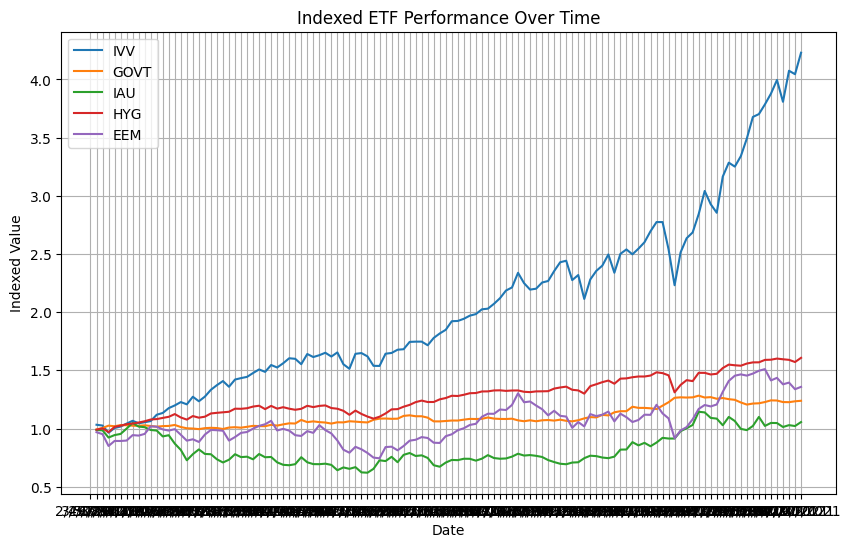

In [8]:
# Plot the indexed ETFs
plt.figure(figsize=(10, 6))
for column in indexed_etfs.columns:
    plt.plot(indexed_etfs.index, indexed_etfs[column], label=column)

plt.title('Indexed ETF Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Indexed Value')
plt.legend()
plt.grid(True)
plt.show()

By looking at the plot, we can tell that IVV ETFs have shown stronger performance in terms of growth relative to their starting points. IVV ETF both has a higher slope and reached higher indexed values, indicating stronger returns. In terms of the volatility of ETF, GOVT has little variability in line.

In [9]:
# Compute the covariance matrix
covariance_matrix = monthly_returns.cov()

# Compute the correlation matrix
correlation_matrix = monthly_returns.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Display the covariance matrix
print("\nCovariance Matrix:")
print(covariance_matrix)

Correlation Matrix:
           IVV      GOVT       IAU       HYG       EEM
IVV   1.000000 -0.317766  0.063443  0.729449  0.684103
GOVT -0.317766  1.000000  0.362839 -0.114264 -0.194049
IAU   0.063443  0.362839  1.000000  0.292637  0.241144
HYG   0.729449 -0.114264  0.292637  1.000000  0.706892
EEM   0.684103 -0.194049  0.241144  0.706892  1.000000

Covariance Matrix:
           IVV      GOVT       IAU       HYG       EEM
IVV   0.001430 -0.000125  0.000102  0.000518  0.001211
GOVT -0.000125  0.000109  0.000161 -0.000022 -0.000095
IAU   0.000102  0.000161  0.001815  0.000234  0.000481
HYG   0.000518 -0.000022  0.000234  0.000352  0.000621
EEM   0.001211 -0.000095  0.000481  0.000621  0.002193


From the correlation matrix, we can tell that IVV and GOVT are negatively correlated during selected period of time. Which t confirms the typical risk-off relationship where investors switch between these asset classes based on market conditions.

In [10]:
# Extract variances (diagonal elements) from the covariance matrix
variances = np.diagonal(covariance_matrix)

# Compute standard deviations from the variances
standard_deviations = np.sqrt(variances)

# Annualize the standard deviations
annualized_std_devs = standard_deviations * np.sqrt(12)

# Display the annualized standard deviations
etf_names = ['IVV', 'GOVT', 'IAU', 'HYG', 'EEM']
for etf, std in zip(etf_names, annualized_std_devs):
    print(f"Annualized Standard Deviation for {etf}: {std:.4f}")

Annualized Standard Deviation for IVV: 0.1310
Annualized Standard Deviation for GOVT: 0.0362
Annualized Standard Deviation for IAU: 0.1476
Annualized Standard Deviation for HYG: 0.0650
Annualized Standard Deviation for EEM: 0.1622


Compute the annualized standard deviations of each ETF using the covariance matrix.
EEM, IAU, IVV have a high Standard Deviation, indicating higher volatility and therefore higher risk, as the investment’s returns vary more widely around the mean return. Stocks ETFs typically exhibit higher volatility compared to bond ETFs due to the nature of the equities market. Gold can behave differently, sometimes acting as a safe haven and other times being quite volatile.


In [11]:
# Compute the monthly covariance matrix
monthly_covariance_matrix = monthly_returns.cov()
# Convert monthly covariance matrix to annual covariance matrix
annual_covariance_matrix = monthly_covariance_matrix * 12

# Compute eigenvalues
eigenvalues, _ = np.linalg.eig(annual_covariance_matrix)
print("Eigenvalues of the covariance matrix:", eigenvalues)

# Compute the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(annual_covariance_matrix)

# Create a vector of ones
ones_vec = np.ones(len(inv_cov_matrix))

# Compute weights for the GMVP
weights_gmvp = np.dot(inv_cov_matrix, ones_vec) / np.dot(ones_vec.T, np.dot(inv_cov_matrix, ones_vec))

print("Weights of the GMVP:", weights_gmvp)
print("Sum of weights:", np.sum(weights_gmvp))

# Compute variance of the GMVP
variance_gmvp = np.dot(weights_gmvp.T, np.dot(annual_covariance_matrix, weights_gmvp))

# Compute standard deviation of the GMVP
std_dev_gmvp = np.sqrt(variance_gmvp)

print("Variance of the GMVP:", variance_gmvp)
print("Standard Deviation of the GMVP:", std_dev_gmvp)

Eigenvalues of the covariance matrix: [0.04146612 0.02076922 0.00621832 0.00140357 0.0009367 ]
Weights of the GMVP: [ 0.0468329   0.79274642 -0.06333758  0.23877981 -0.01502155]
Sum of weights: 1.0
Variance of the GMVP: 0.0007970154151267806
Standard Deviation of the GMVP: 0.028231461441568705


In [15]:
##############a.	Compute the Global Minimum Variance Portfolio (GMVP)

# Compute the monthly covariance matrix
monthly_covariance_matrix = monthly_returns.cov()

# Convert monthly covariance matrix to annual covariance matrix
annual_covariance_matrix = monthly_covariance_matrix * 12

# Expected annual returns for each ETF
expected_returns = np.array([0.06, 0.016, 0.03, 0.032, 0.071])  # IVV, GOVT, IAU, HYG, EEM

# Compute the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(annual_covariance_matrix)

# Create a vector of ones
ones_vec = np.ones(len(inv_cov_matrix))

# Compute weights for the GMVP
weights_gmvp = np.dot(inv_cov_matrix, ones_vec) / np.dot(ones_vec.T, np.dot(inv_cov_matrix, ones_vec))

# Compute variance of the GMVP
variance_gmvp = np.dot(weights_gmvp.T, np.dot(annual_covariance_matrix, weights_gmvp))

# Compute standard deviation of the GMVP
std_dev_gmvp = np.sqrt(variance_gmvp)

# Compute the expected return of the GMVP
portfolio_expected_return = np.dot(weights_gmvp, expected_returns)

# Display results
print("Portfolio Std Dev & Variance:", f"Std Dev: {std_dev_gmvp:.4f}; Variance: {variance_gmvp:.4f}")
print("Portfolio Expected Return:", f"{portfolio_expected_return:.4f}")
print("Portfolio Weights for Each Asset:")
for asset, weight in zip(['IVV', 'GOVT', 'IAU', 'HYG', 'EEM'], weights_gmvp):
    print(f"{asset}: {weight:.4f}")


Portfolio Std Dev & Variance: Std Dev: 0.0282; Variance: 0.0008
Portfolio Expected Return: 0.0202
Portfolio Weights for Each Asset:
IVV: 0.0468
GOVT: 0.7927
IAU: -0.0633
HYG: 0.2388
EEM: -0.0150


In [17]:
############# b.	Compute a Minimum Variance Portfolio (MVP)


import pandas as pd
import numpy as np

# Load the data and calculate the monthly total returns
df = pd.read_csv('/Users/ouyangyingrun/Desktop/ETF Time Series Index Returns.csv', index_col=0, skiprows=6, names=['IVV', 'GOVT', 'IAU', 'HYG', 'EEM'], nrows=119)
monthly_returns = df.pct_change()
annual_covariance_matrix = monthly_returns.cov() * 12

# Expected annual returns for each ETF
expected_returns = np.array([0.06, 0.016, 0.03, 0.032, 0.071])  # IVV, GOVT, IAU, HYG, EEM
target_return = 0.05

# Compute A, B, C, and D
ones_vec = np.ones(len(expected_returns))
inv_cov_matrix = np.linalg.inv(annual_covariance_matrix)

A = np.dot(ones_vec.T, np.dot(inv_cov_matrix, ones_vec))
B = np.dot(ones_vec.T, np.dot(inv_cov_matrix, expected_returns))
C = np.dot(expected_returns.T, np.dot(inv_cov_matrix, expected_returns))
D = A * C - B**2

# Compute Lambda 1 and Lambda 2
lambda_1 = (C - B * target_return) / D
lambda_2 = (A * target_return - B) / D

# Compute the weights for MVP
weights_mvp = np.dot(inv_cov_matrix, (lambda_1 * ones_vec + lambda_2 * expected_returns))

# Compute the expected return, variance, and standard deviation for the MVP
expected_return_mvp = np.dot(weights_mvp, expected_returns)
variance_mvp = np.dot(weights_mvp.T, np.dot(annual_covariance_matrix, weights_mvp))
std_dev_mvp = np.sqrt(variance_mvp)

# Output results
print("Constants A, B, C, D:", A, B, C, D)
print("Lagrange multipliers λ1, λ2:", lambda_1, lambda_2)
print("Portfolio Weights for MVP:")
for asset, weight in zip(['IVV', 'GOVT', 'IAU', 'HYG', 'EEM'], weights_mvp):
    print(f"{asset}: {weight:.4f}")
print("Sum of weights:", np.sum(weights_mvp))
print("Portfolio Expected Return for MVP:", expected_return_mvp)
print("Portfolio Std Dev & Variance for MVP:", f"Std Dev: {std_dev_mvp:.4f}; Variance: {variance_mvp:.4f}")



Constants A, B, C, D: 1254.6808769576069 25.304671326325632 0.6432464382272988 166.74261428151772
Lagrange multipliers λ1, λ2: -0.0037302229593141624 0.2244739455647572
Portfolio Weights for MVP:
IVV: 0.5231
GOVT: 0.6478
IAU: 0.0284
HYG: -0.5526
EEM: 0.3532
Sum of weights: 0.9999999999999984
Portfolio Expected Return for MVP: 0.049999999999999996
Portfolio Std Dev & Variance for MVP: Std Dev: 0.0866; Variance: 0.0075


Asset with Greatest Weight: The asset with the greatest weight might reflect a combination of lower risk and correlation with other assets. Holding Lower-Risk Assets: The GMVP does not only hold the lowest-risk asset due to diversification benefits from combining assets with differing correlations.

In [23]:
############# c.	“Mutual Fund” Theorem

import numpy as np


weights_gmvp = np.array([0.0468, 0.7927, -0.0633, 0.2388, -0.0150])  
weights_mvp = np.array([0.5231, 0.6478, 0.0284, -0.5526, 0.3532])

# Calculate the weights for the mutual fund
# The mutual fund weights are calculated as the difference scaled by a factor
scaling_factor = 1  # Example scaling factor, adjust based on actual application needs
weights_mutual_fund = (weights_mvp - weights_gmvp) * scaling_factor

# Calculate the combined weights of the mutual fund and the GMVP to confirm it replicates the MVP
combined_weights = weights_gmvp + weights_mutual_fund

# Output the results
print("Mutual Fund Weights:", weights_mutual_fund)
print("Original Optimal Portfolio Weights (MVP):", weights_mvp)
print("Weights of Mutual Fund Combined with GMVP:", combined_weights)


Mutual Fund Weights: [ 0.4763 -0.1449  0.0917 -0.7914  0.3682]
Original Optimal Portfolio Weights (MVP): [ 0.5231  0.6478  0.0284 -0.5526  0.3532]
Weights of Mutual Fund Combined with GMVP: [ 0.5231  0.6478  0.0284 -0.5526  0.3532]


In [25]:


import numpy as np
import pandas as pd

# Assume risk-free rate and expected returns for the ETFs
risk_free_rate = 0.005  # 0.5%
expected_returns = np.array([0.06, 0.016, 0.03, 0.032, 0.071])  # Annual expected returns for IVV, GOVT, IAU, HYG, EEM

# Mock covariance matrix setup (replace with actual data)
data = {
    'IVV': np.random.normal(0.05, 0.15, 100),
    'GOVT': np.random.normal(0.01, 0.05, 100),
    'IAU': np.random.normal(0.02, 0.10, 100),
    'HYG': np.random.normal(0.03, 0.20, 100),
    'EEM': np.random.normal(0.04, 0.25, 100)
}
df = pd.DataFrame(data)
annual_covariance_matrix = df.cov() * 12  # Annualizing the covariance matrix

# Calculate excess returns over the risk-free rate
excess_returns = expected_returns - risk_free_rate

# Compute weights for the MSRP
inv_cov_matrix = np.linalg.inv(annual_covariance_matrix)
weights_msrp = np.dot(inv_cov_matrix, excess_returns) / np.dot(excess_returns.T, np.dot(inv_cov_matrix, excess_returns))

# Print the calculated portfolio weights
print("Weights for the Maximum Sharpe Ratio Portfolio (MSRP):")
for i, asset in enumerate(['IVV', 'GOVT', 'IAU', 'HYG', 'EEM']):
    print(f"{asset}: {weights_msrp[i]:.4f}")



Weights for the Maximum Sharpe Ratio Portfolio (MSRP):
IVV: 9.1754
GOVT: 11.5401
IAU: 8.1548
HYG: 2.0007
EEM: 1.6746
